# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 604


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units={units}&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port-aux-francais
Processing Record 2 of Set 1 | taiohae
City not found. Skipping...
Processing Record 3 of Set 1 | adamstown
Processing Record 4 of Set 1 | qaqortoq
Processing Record 5 of Set 1 | iskateley
Processing Record 6 of Set 1 | iqaluit
Processing Record 7 of Set 1 | hammerfest
Processing Record 8 of Set 1 | edinburgh of the seven seas
Processing Record 9 of Set 1 | natal
Processing Record 10 of Set 1 | waitangi
Processing Record 11 of Set 1 | georgetown
Processing Record 12 of Set 1 | constantia
Processing Record 13 of Set 1 | egilsstadir
Processing Record 14 of Set 1 | smidovich
Processing Record 15 of Set 1 | ushuaia
Processing Record 16 of Set 1 | codrington
Processing Record 17 of Set 1 | bredasdorp
Processing Record 18 of Set 1 | puerto berrio
Processing Record 19 of Set 1 | avarua
Processing Record 20 of Set 1 | bardai
Processing Record 21 of Set 1 | ottawa
Processing Record 22 of

Processing Record 39 of Set 4 | manta
Processing Record 40 of Set 4 | kroya
Processing Record 41 of Set 4 | cuenca
Processing Record 42 of Set 4 | hovd
Processing Record 43 of Set 4 | itaituba
Processing Record 44 of Set 4 | kodiak
Processing Record 45 of Set 4 | chul'man
Processing Record 46 of Set 4 | port macquarie
Processing Record 47 of Set 4 | nema
Processing Record 48 of Set 4 | kayangel
Processing Record 49 of Set 4 | zaozersk
Processing Record 0 of Set 5 | alice springs
Processing Record 1 of Set 5 | dois corregos
Processing Record 2 of Set 5 | horta
Processing Record 3 of Set 5 | ancud
Processing Record 4 of Set 5 | uniao da vitoria
Processing Record 5 of Set 5 | chernyshevskiy
Processing Record 6 of Set 5 | kavaratti
Processing Record 7 of Set 5 | cimitarra
Processing Record 8 of Set 5 | khor
Processing Record 9 of Set 5 | shache
Processing Record 10 of Set 5 | shira
Processing Record 11 of Set 5 | saiha
Processing Record 12 of Set 5 | stanley
Processing Record 13 of Set 5 |

Processing Record 34 of Set 8 | lincheng
Processing Record 35 of Set 8 | dalnegorsk
Processing Record 36 of Set 8 | carrigaline
Processing Record 37 of Set 8 | goundam
Processing Record 38 of Set 8 | ilhabela
Processing Record 39 of Set 8 | igarka
Processing Record 40 of Set 8 | tosontsengel
Processing Record 41 of Set 8 | mount isa
Processing Record 42 of Set 8 | arraial do cabo
Processing Record 43 of Set 8 | ghormach
Processing Record 44 of Set 8 | labasa
Processing Record 45 of Set 8 | howrah
Processing Record 46 of Set 8 | uludere
Processing Record 47 of Set 8 | fuvahmulah
City not found. Skipping...
Processing Record 48 of Set 8 | paka
Processing Record 49 of Set 8 | raja
Processing Record 0 of Set 9 | 'ohonua
City not found. Skipping...
Processing Record 1 of Set 9 | kerikeri
Processing Record 2 of Set 9 | north haven
Processing Record 3 of Set 9 | ulladulla
Processing Record 4 of Set 9 | nadi
Processing Record 5 of Set 9 | liupanshui
City not found. Skipping...
Processing Recor

Processing Record 25 of Set 12 | sao jose da coroa grande
Processing Record 26 of Set 12 | forster
Processing Record 27 of Set 12 | mabaruma
Processing Record 28 of Set 12 | champerico
Processing Record 29 of Set 12 | korla
Processing Record 30 of Set 12 | beaufort west
Processing Record 31 of Set 12 | myeik
Processing Record 32 of Set 12 | ar ruways
Processing Record 33 of Set 12 | tafuna
Processing Record 34 of Set 12 | kalaoa
Processing Record 35 of Set 12 | port saint john's
Processing Record 36 of Set 12 | nguekhokh
Processing Record 37 of Set 12 | polyarnyye zori
Processing Record 38 of Set 12 | nishifukuma
Processing Record 39 of Set 12 | ambalangoda
Processing Record 40 of Set 12 | miles city
Processing Record 41 of Set 12 | aldan
Processing Record 42 of Set 12 | thinadhoo
Processing Record 43 of Set 12 | mana
Processing Record 44 of Set 12 | gagarin
Processing Record 45 of Set 12 | asha
Processing Record 46 of Set 12 | minas de marcona
Processing Record 47 of Set 12 | la foa
P

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          581
Lat           581
Lng           581
Max Temp      581
Humidity      581
Cloudiness    581
Wind Speed    581
Country       581
Date          581
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port-aux-francais,-49.3500,70.2167,4.62,90,100,14.54,TF,1694743439
1,adamstown,-25.0660,-130.1015,18.70,63,100,11.64,PN,1694743440
2,qaqortoq,60.7167,-46.0333,6.16,86,100,2.93,GL,1694743440
3,iskateley,67.6803,53.1512,6.44,94,100,5.59,RU,1694743440
4,iqaluit,63.7506,-68.5145,0.85,93,75,3.09,CA,1694743214


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,4.62,90,100,14.54,TF,1694743439
1,adamstown,-25.0660,-130.1015,18.70,63,100,11.64,PN,1694743440
2,qaqortoq,60.7167,-46.0333,6.16,86,100,2.93,GL,1694743440
3,iskateley,67.6803,53.1512,6.44,94,100,5.59,RU,1694743440
4,iqaluit,63.7506,-68.5145,0.85,93,75,3.09,CA,1694743214


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

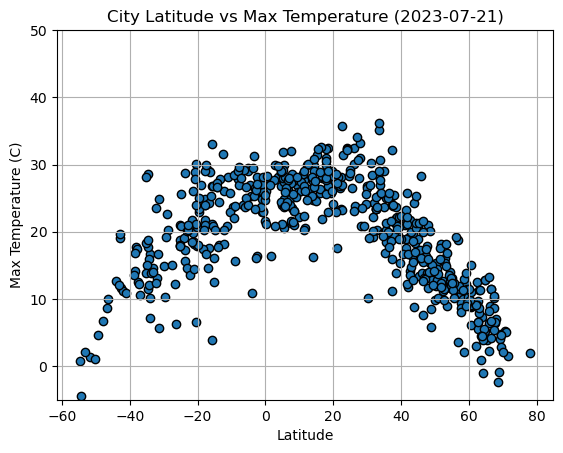

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"], edgecolors="black") 

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Latitude vs Max Temperature (2023-07-21)")
plt.grid(True)
plt.ylim(-5,50)

# Save the figure
plt.savefig("output_data/citylatvstemp.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

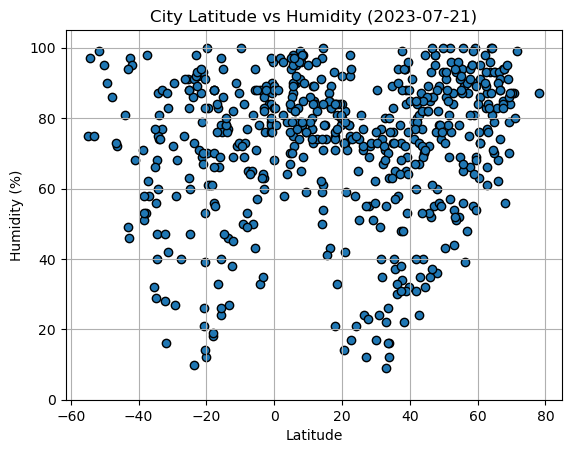

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"], edgecolors="black") 

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs Humidity (2023-07-21)")
plt.grid(True)
plt.ylim(0,105)
# Save the figure
plt.savefig("output_data/citylatvshum.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

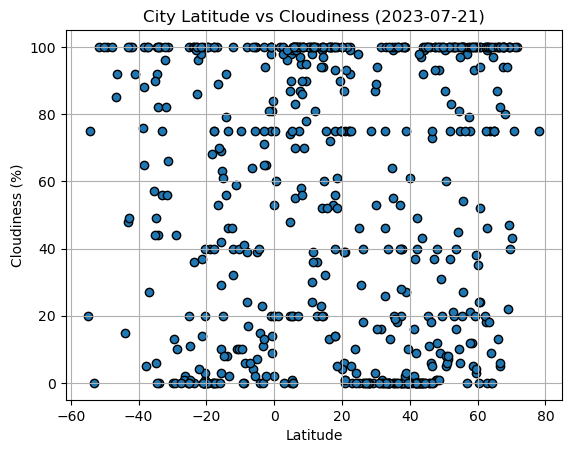

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"], edgecolors="black") 

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs Cloudiness (2023-07-21)")
plt.grid(True)
plt.ylim(-5,105)
# Save the figure
plt.savefig("output_data/citylatvscloud.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

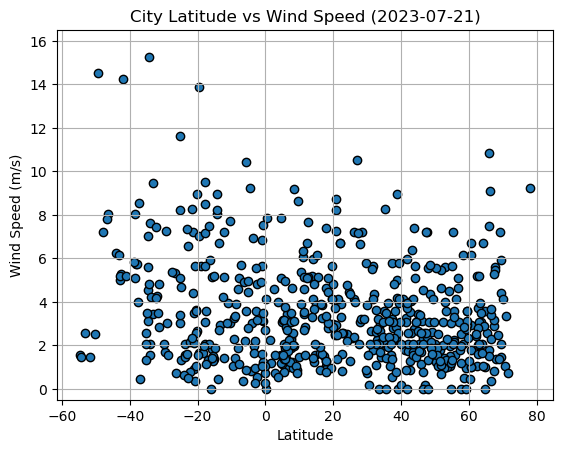

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"], edgecolors="black") 

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs Wind Speed (2023-07-21)")
plt.grid(True)
plt.ylim(-.5,16.5)

# Save the figure
plt.savefig("output_data/citylatvswind.png")

# Show plot
plt.show()


---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def regression_plot(df, x_col, y_col):
    
    x_values = df[x_col].values
    y_values = df[y_col].values
    
# Run linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
    plt.scatter(x_values,y_values)

# Plot regression line
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(min(x_values),min(y_values)),fontsize=15,color="red")

# Label plot
    plt.xlabel(x_col)
    plt.ylabel(y_col)

# Print r square value
    print(f"the r-value: {abs(rvalue)}")
    
# Show plot
    plt.show()

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,qaqortoq,60.7167,-46.0333,6.16,86,100,2.93,GL,1694743440
3,iskateley,67.6803,53.1512,6.44,94,100,5.59,RU,1694743440
4,iqaluit,63.7506,-68.5145,0.85,93,75,3.09,CA,1694743214
5,hammerfest,70.6634,23.6821,5.25,87,75,1.03,NO,1694743441
9,georgetown,5.4112,100.3354,29.97,87,20,2.06,MY,1694743442


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] <0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,4.62,90,100,14.54,TF,1694743439
1,adamstown,-25.0660,-130.1015,18.70,63,100,11.64,PN,1694743440
6,edinburgh of the seven seas,-37.0676,-12.3116,10.64,58,27,0.47,SH,1694743441
7,natal,-5.7950,-35.2094,24.36,94,75,3.60,BR,1694743223
8,waitangi,-43.9535,-176.5597,12.68,81,15,6.26,NZ,1694743442


###  Temperature vs. Latitude Linear Regression Plot

the r-value: 0.8370573229202075


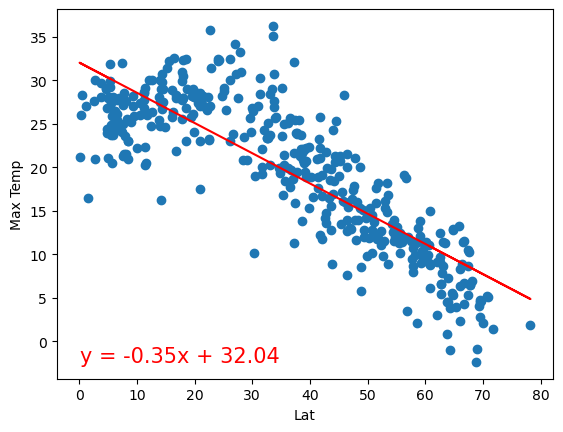

In [15]:
# Linear regression on Northern Hemisphere
regression_plot(northern_hemi_df,"Lat","Max Temp")

the r-value: 0.7080225175765995


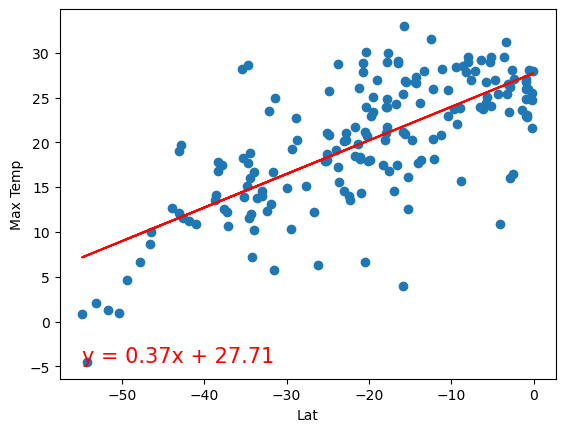

In [16]:
# Linear regression on Southern Hemisphere
regression_plot(southern_hemi_df,"Lat", "Max Temp")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

the r-value: 0.04533901459878408


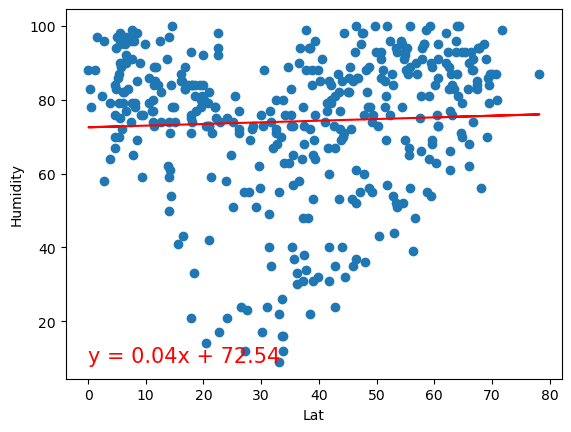

In [17]:
# Northern Hemisphere
x_values = "Lat"
y_values = "Humidity"
regression_plot(northern_hemi_df,"Lat", "Humidity")

the r-value: 0.03401088178585887


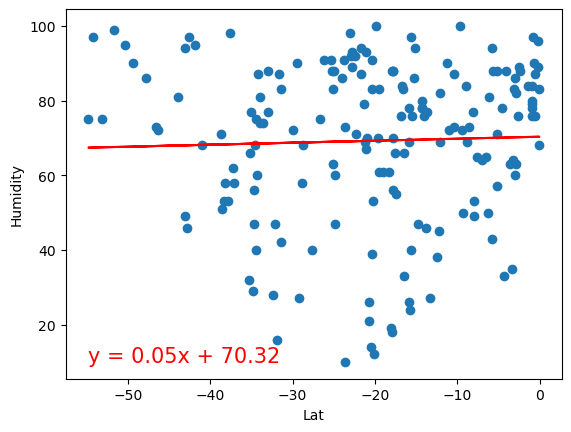

In [18]:
# Southern Hemisphere
x_values = "Lat"
y_values = "Humidity"
regression_plot(southern_hemi_df,"Lat", "Humidity")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

the r-value: 0.04041908464846659


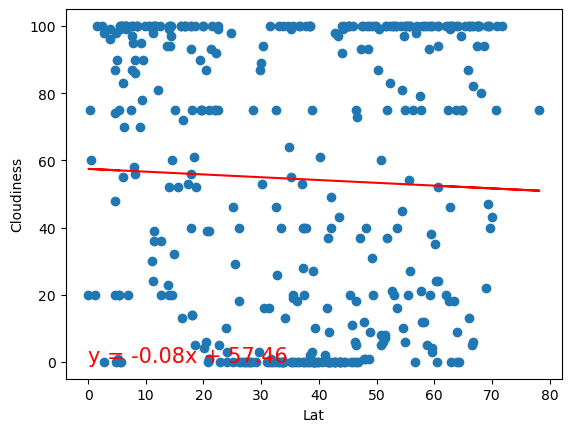

In [19]:
# Northern Hemisphere
regression_plot(northern_hemi_df,"Lat", "Cloudiness")

the r-value: 0.18042875340615755


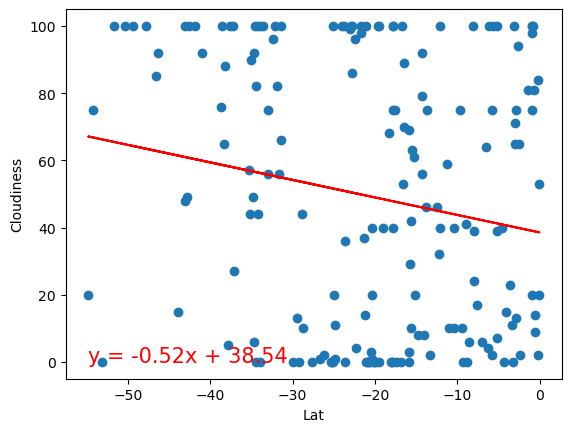

In [20]:
# Southern Hemisphere
regression_plot(southern_hemi_df,"Lat", "Cloudiness")

### Wind Speed vs. Latitude Linear Regression Plot

the r-value: 0.03128345265328154


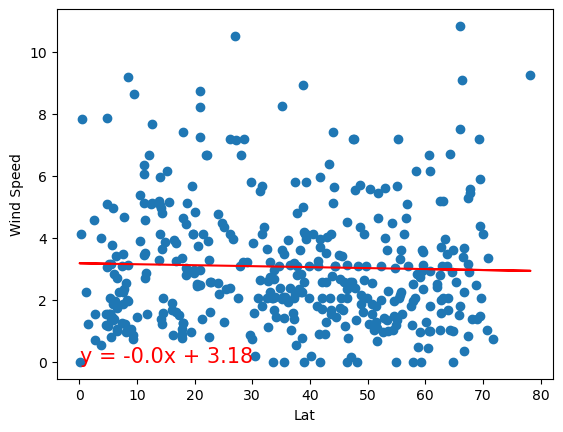

In [21]:
# Northern Hemisphere
regression_plot(northern_hemi_df,"Lat", "Wind Speed")

the r-value: 0.22636364272606757


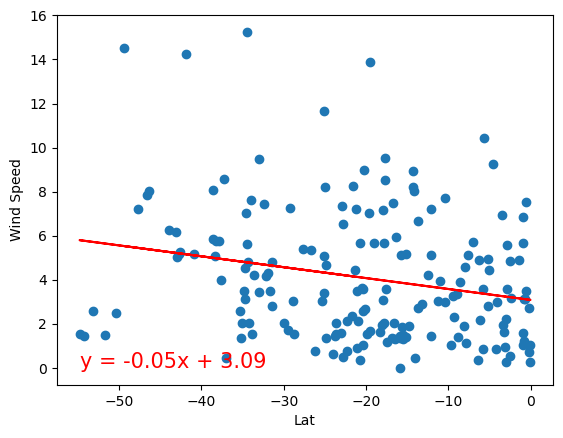

In [22]:
# Southern Hemisphere
regression_plot(southern_hemi_df,"Lat", "Wind Speed")